# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [14]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [15]:
df = pd.read_csv("lab12_files/US_Baby_Names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [16]:
baby_names = df
print(baby_names.dtypes)
print(f'Ilość rekordów: {len(baby_names)}')

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
Ilość rekordów: 1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [17]:
display(baby_names.head(10))

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [18]:
baby_names.drop('Unnamed: 0', axis=1, inplace=True)
baby_names.drop('Id', axis=1, inplace=True)
display(baby_names.head())

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [19]:
counts = baby_names['Gender'].value_counts()
print(counts)
if counts.keys()[0] == 'F':
    print('W zbiorze jest więcej imion kobiet')
else:
    print('W zbiorze jest więcej imion mężczyzn')

Gender
F    558846
M    457549
Name: count, dtype: int64
W zbiorze jest więcej imion kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [20]:
top_names = baby_names['Name'].value_counts().head(10)
display(pd.DataFrame(top_names))

,count
Name,
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049
Taylor,1033
Jayden,1031
Alexis,984
Payton,971


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

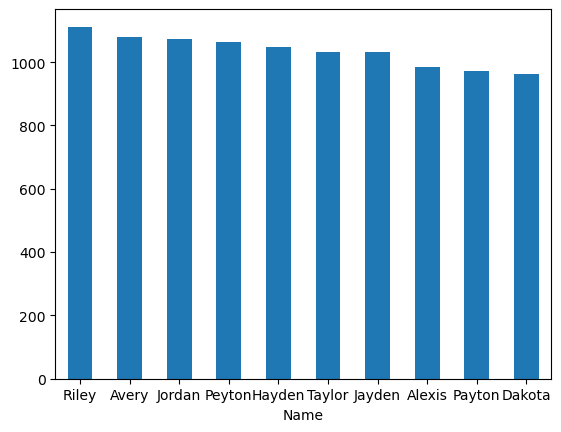

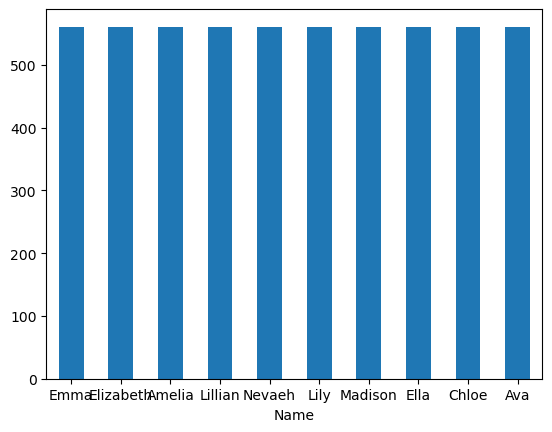

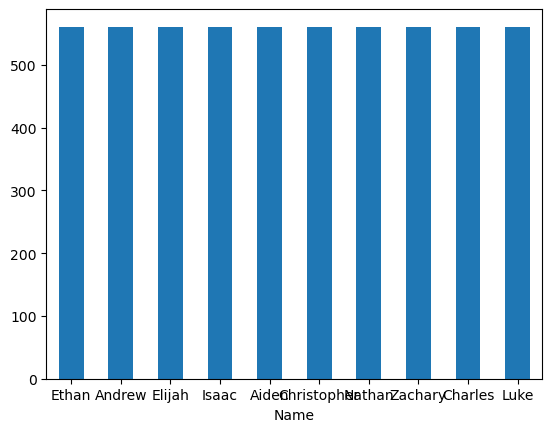

In [21]:
import matplotlib.pyplot as plt
top_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

top_female_names = df[df['Gender'] == 'F']['Name'].value_counts().head(10)
top_female_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

top_male_names = df[df['Gender'] == 'M']['Name'].value_counts().head(10)
top_male_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [22]:
print(df['Name'].nunique())

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [23]:
import numpy as np

def name_generator(names, names_prob):
    while True:
        generated_name = np.random.choice(names.index, p=names_prob)
        yield generated_name

names = baby_names['Name'].value_counts()
names_prob = names / names.sum()

for i, n in enumerate(name_generator(names, names_prob)):
    if i > 10:
        break
    print(n)

Atharv
Brady
Janyla
Antonia
Judah
Avin
Jordan
Eian
Chad
Jaqueline
Dawson


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [24]:
print(baby_names['Name'].value_counts().index[0])
display(baby_names['Name'].value_counts().agg([np.sum, np.mean, np.std]))

Riley


sum     1.016395e+06
mean    5.764491e+01
std     1.220300e+02
Name: count, dtype: float64

## Część II

Krok 1: Wczytaj dane

In [129]:
df = pd.read_csv("lab12_files/ocupation.csv", sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [130]:
display(df.head(25))

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [131]:
display(df.tail(10))

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [132]:
print(f'Liczba obserwacji: {df.shape[0]}')
print(f'Liczba kolumn: {df.shape[1]}')

Liczba obserwacji: 943
Liczba kolumn: 5


Krok 5: Wypisz nazwy kolumn

In [133]:
list(df.columns)

['user_id', 'age', 'gender', 'occupation', 'zip_code']

Krok 6: Ile różnych zawodów jest w zbiorze?

In [134]:
len(df['occupation'].unique())

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

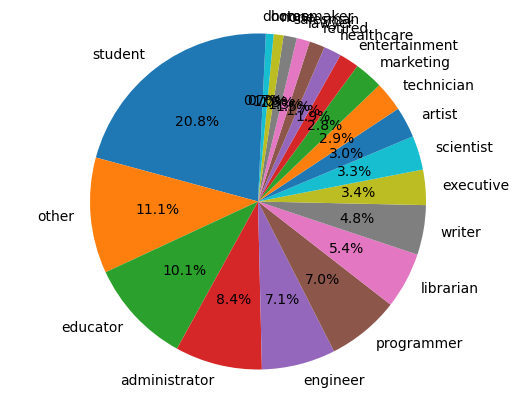

In [135]:
import matplotlib.pyplot as plt

sizes = df['occupation'].value_counts()
labels = sizes.keys()

_, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

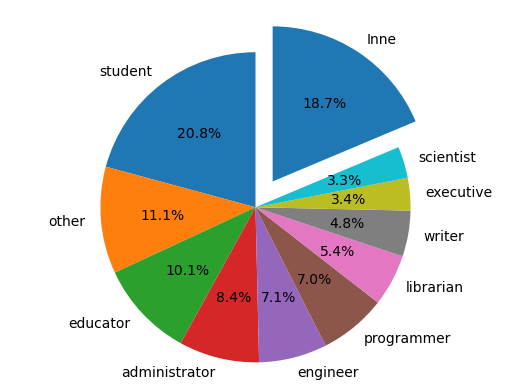

In [142]:
other_size = sizes[10:].sum()
labels2 = sizes.keys()[:11].to_list()
labels2[10] = 'Inne'
sizes2 = sizes.head(11).to_list()
sizes2[10] = other_size

myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]

_, ax1 = plt.subplots()
ax1.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, explode=myexplode)
ax1.axis('equal')
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

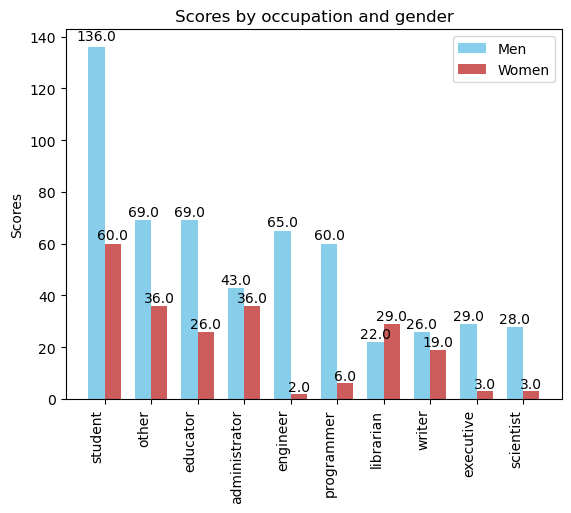

In [137]:
grouped = df.groupby(['occupation', 'gender']).size().unstack()
grouped['Sum'] = grouped.sum(axis=1)
top_ten = grouped.nlargest(10, columns='Sum')
men_count = top_ten['M']
women_count = top_ten['F']
labels = top_ten.index

ind = np.arange(len(men_count))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_count, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_count, width, color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by occupation and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.xticks(rotation=90, ha='right')
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

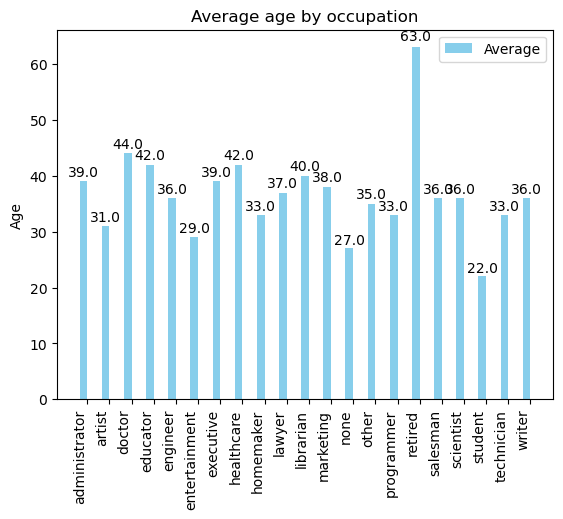

In [144]:
grouped = df.groupby('occupation')
means = grouped['age'].mean().round().to_list()
labels = list(grouped.groups)

ind = np.arange(len(means))  # the x locations for the groups

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means, width, color='SkyBlue', label='Average')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age')
ax.set_title('Average age by occupation')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)

plt.xticks(rotation=90, ha='right')
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

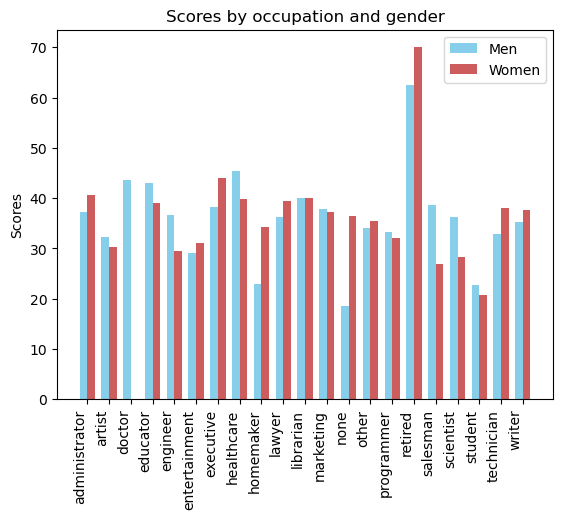

In [139]:
average_ages = df.groupby(['occupation', 'gender'])['age'].mean()
men_means = average_ages.unstack()['M'].to_list()
women_means = average_ages.unstack()['F'].to_list()

ind = np.arange(len(men_means))  # the x locations for the groups

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, color='IndianRed', label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by occupation and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90, ha='right')
plt.show()